### Analyzing Time Series

#### Warmup 🌶🌶🌶: Compose a Time Series
- **Trend**
- **Seasonality**
- Remainder
    - Time Dependence
    - **Noise**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(0, 100, 101)
#some arbitrary x data.

In [15]:
#First component
y_trend = np.array([2*x_val + 0 for x_val in x])

#or easier:
y_trend = 2*x + 0

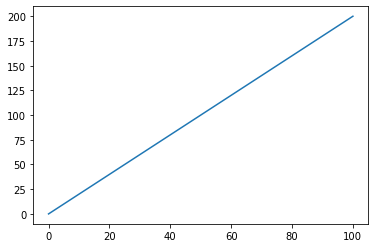

In [16]:
plt.plot(x, y_trend)

In [34]:
y_season = 50*np.sin(50*x)

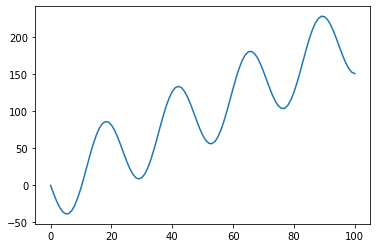

In [35]:
plt.plot(x, y_season + y_trend)

In [49]:
y_noise = np.random.normal(loc=0, scale=15, size=101)

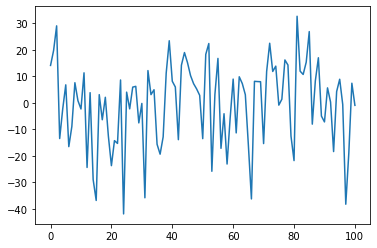

In [50]:
plt.plot(x, y_noise)

In [51]:
y = y_trend + y_season + y_noise

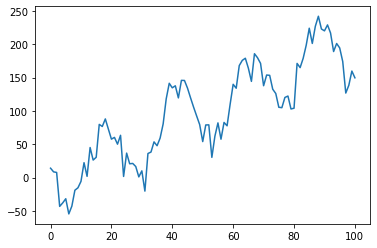

In [52]:
plt.plot(x, y)

---
---

### Let's analyze ("decompose") a Time Series

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#some aesthetic setting for plotting for the rest of the notebook
sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [55]:
df = pd.read_csv('flights_train.csv', index_col=0, parse_dates=True)

<AxesSubplot:xlabel='date'>

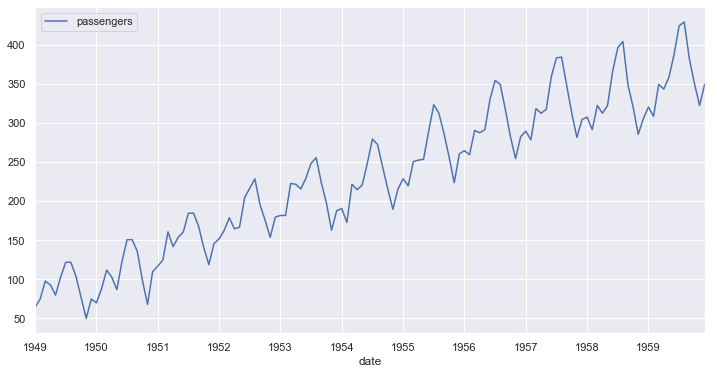

In [60]:
df.plot()

---

### 1. Model the Trend


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
m = LinearRegression()

In [67]:
df['timestep'] = range(len(df))

In [71]:
X = df[['timestep']] #matrix (or DataFrame)
y = df['passengers'] #vector (or Series)

In [72]:
m.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
m.coef_ #our trend / slope

array([2.31764439])

In [74]:
df['trend'] = m.predict(X)

<AxesSubplot:xlabel='date'>

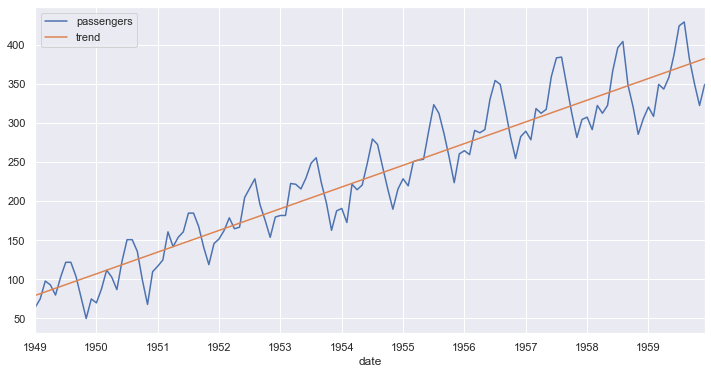

In [76]:
df[['passengers', 'trend']].plot()

In [79]:
# (df['passengers'] - df['trend']).plot()

### 2. Model the seasonality


<AxesSubplot:xlabel='date'>

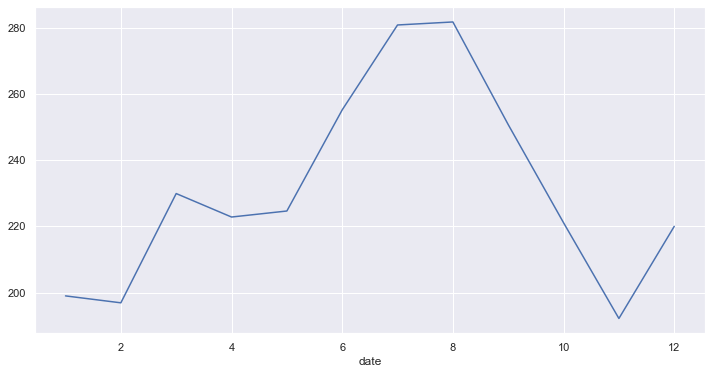

In [82]:
df.groupby(df.index.month)['passengers'].mean().plot()

In [84]:
df['month'] = df.index.month

In [88]:
seasonal_dummies = pd.get_dummies(df['month'], prefix='month_')
#ASSUMPTION: The seasonality is monthly!

In [95]:
df = df.merge(seasonal_dummies, left_index=True, right_index=True)

In [97]:
X = df.drop(['passengers', 'trend', 'month'], axis=1) 
#another way of saying X should be timestep + all the month dummies
#axis=1 means that these are all columns, not rows


y = df['passengers']

In [98]:
m.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
months = df.index.month.unique()

<AxesSubplot:xlabel='0'>

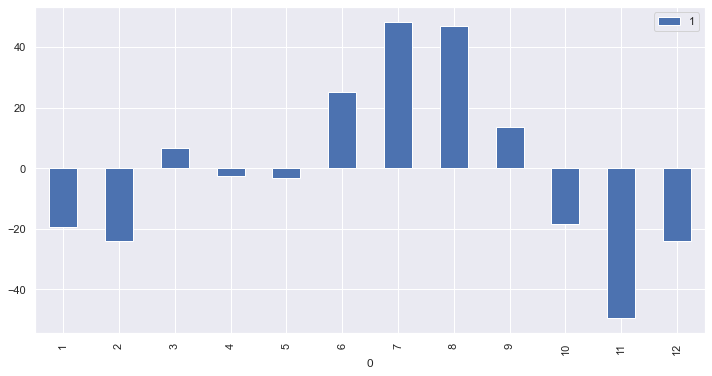

In [110]:
pd.DataFrame(zip(months, m.coef_[1:])).set_index(0).plot.bar()

In [100]:
df['trend_AND_seasonality'] = m.predict(X)

<AxesSubplot:xlabel='date'>

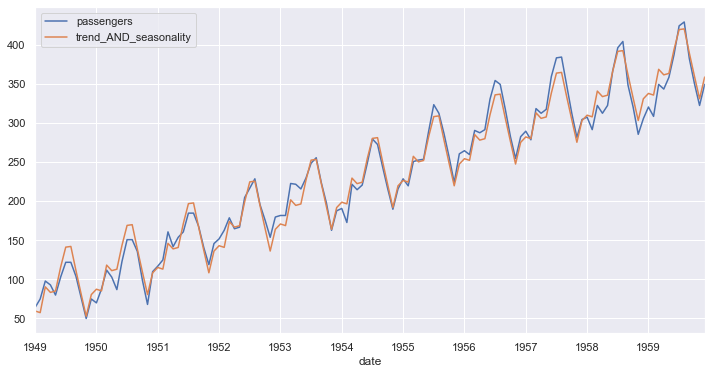

In [102]:
df[['passengers', 'trend_AND_seasonality']].plot()

### 3. Extracting the Remainder
- The final (third) component of the Time Series is what we actually care about in Time Series Analysis

In [111]:
df['remainder'] = df['passengers'] - df['trend_AND_seasonality']

<AxesSubplot:xlabel='date'>

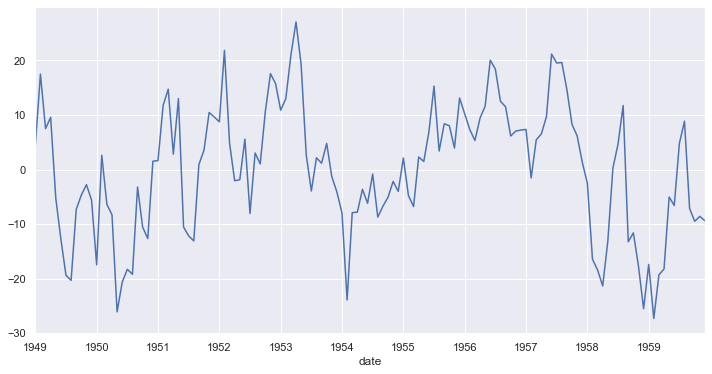

In [112]:
df['remainder'].plot()

In [113]:
df['remainder'].to_csv('flights_remainder.csv')

---

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [115]:
sd = seasonal_decompose(df['passengers'])

In [124]:
# sd.resid.plot()

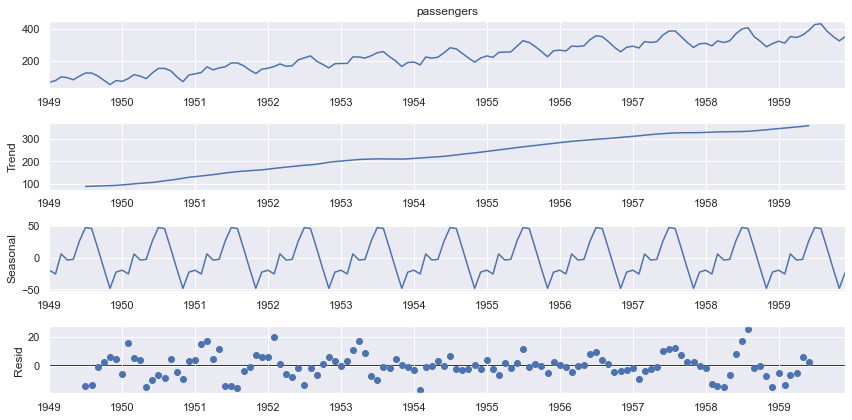

In [117]:
sd.plot()
None